# Data Upload

In [1]:
#install relevant packages
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

In [2]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np

In [3]:
free_comps = sb.competitions()
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [4]:
current_comps = free_comps[free_comps['season_name'].apply(lambda x: int(x.split('/')[0]) >= 2024)]
current_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
21,223,282,South America,Copa America,male,False,True,2024,2024-11-04T16:15:34.886972,None,None,2024-11-04T16:15:34.886972
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-09-28T16:51:20.698794,2025-03-24T14:12:30.785094,2025-03-24T14:12:30.785094,2024-09-28T16:51:20.698794
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348


In [5]:
euro_2025_female_matches = sb.matches(competition_id=53, season_id=315)
euro_2025_female_matches.shape

(31, 22)

In [6]:
events_df = sb.competition_events(
country="Europe",
division="UEFA Women's Euro",
season="2025",
gender="female")

events_df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England Women's,865,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Spain Women's,863,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 451, 'lineup': [{'player': {'id'...",Germany Women's,857,00:00:00.000,Starting XI,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Spain Women's,863,00:00:00.000,Starting XI,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England Women's,865,00:00:00.000,Starting XI,NaN


In [7]:
frames_df = sb.competition_frames(
country="Europe",
division="UEFA Women's Euro",
season="2025",
gender="female")

frames_df.shape

(1332184, 7)

In [8]:
#Coordinates treatment
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

/tmp/ipython-input-3630798258.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
/tmp/ipython-input-3630798258.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
/tmp/ipython-input-3630798258.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) 

In [9]:
events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won',
       ...
       'team_id', 'timestamp', 'type', 'under_pressure', 'x', 'y',
       'pass_end_x', 'pass_end_y', 'carry_end_x', 'carry_end_y'],
      dtype='object', length=119)

# Fast analysis of the data

In [10]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
# Nota: Asegúrate de que 'team' esté filtrado previamente o añade (events_df.team == team) dentro del corchete
f3rd_passes = events_df[(events_df.type == "Pass") & (events_df.x < 80) & (events_df.pass_end_x > 80) & (events_df.pass_outcome.isna())]

# CORRECCIÓN: Usamos ['player', 'team'] en una lista
f3rd_passes_count = f3rd_passes.groupby(['player', 'team']).size().reset_index()

# Renombramos la columna de conteo para que no se llame "0"
f3rd_passes_count.rename(columns={0: "Passes"}, inplace=True)

In [11]:
f3rd_passes_count.sort_values(by='Passes', ascending=False)

,player,team,Passes
191,Patricia Guijarro Gutiérrez,Spain Women's,53
157,Lucy Bronze,England Women's,46
197,Rebecca Knaak,Germany Women's,41
138,Laia Aleixandri López,Spain Women's,40
6,Alex Greenwood,England Women's,38
...,...,...,...
202,Saara Katariina Kosola,WNT Finland,1
198,Rebecka Blomqvist,Sweden Women's,1
196,Rachel Rowe,Wales,1
231,Telma Raquel Velosa Encarnação,Portugal Women's,1


In [12]:
# Filter carries that start before x=80 and end after x=80.
# This captures carries that enter the final third.
f3rd_carries = events_df[(events_df.type == "Carry") & (events_df.x < 80) & (events_df.carry_end_x > 80)]

# Count how many of these carries each player made (separated by team).
f3rd_carries_count = f3rd_carries.groupby(['player', 'team']).size().reset_index()

# Rename columns for clarity.
f3rd_carries_count.columns = ['player', 'team', 'Carries']

# Sort players by number of final third carries (highest first).
f3rd_carries_count = f3rd_carries_count.sort_values(by="Carries", ascending=False)

# Show the result.
f3rd_carries_count

,player,team,Carries
173,Selma Bacha,France Women's,19
85,Johanna Rytting-Kaneryd,Sweden Women's,17
149,Olga Carmona García,Spain Women's,17
105,Klara Bühl,Germany Women's,17
2,Aitana Bonmati Conca,Spain Women's,15
...,...,...,...
170,Sara Däbritz,Germany Women's,1
172,Sarai Linder,Germany Women's,1
182,Sydney Lohmann,Germany Women's,1
185,Synne Jensen,Norway Women's,1


In [13]:
# Merge passes and carries into a single dataframe (by player and team).
# "outer" ensures that players appearing in only one dataset are still included.
progressions_df = pd.merge(f3rd_passes_count, f3rd_carries_count, how="outer", on=["player", "team"])

# Replace missing values with 0 (players who only have passes or only carries).
progressions_df = progressions_df.fillna(0)

# Create a Total column summing final third passes and carries.
progressions_df['Total'] = progressions_df['Passes'] + progressions_df['Carries']

# Sort players by total progressions (highest first).
progressions_df = progressions_df.sort_values(by='Total', ascending=False)

# Display the top 10 players.
progressions_df.head(10)

,player,team,Passes,Carries,Total
207,Patricia Guijarro Gutiérrez,Spain Women's,53.0,3.0,56.0
167,Lucy Bronze,England Women's,46.0,10.0,56.0
146,Laia Aleixandri López,Spain Women's,40.0,8.0,48.0
199,Olga Carmona García,Spain Women's,29.0,17.0,46.0
182,María Francesca Caldentey Oliver,Spain Women's,31.0,15.0,46.0
202,Ona Batlle Pascual,Spain Women's,32.0,12.0,44.0
213,Rebecca Knaak,Germany Women's,41.0,2.0,43.0
8,Alexia Putellas Segura,Spain Women's,28.0,15.0,43.0
231,Selma Bacha,France Women's,23.0,19.0,42.0
6,Alex Greenwood,England Women's,38.0,1.0,39.0


<Figure size 1500x1500 with 0 Axes>

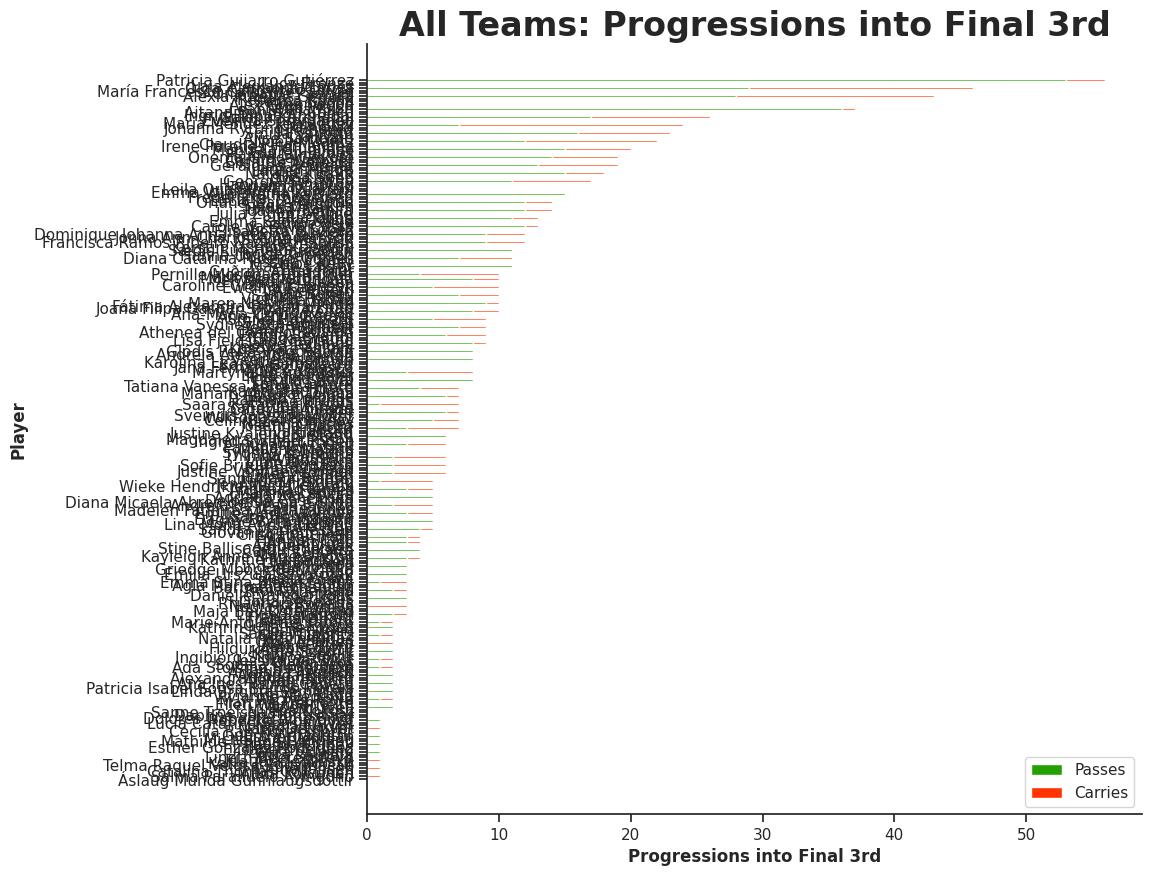

In [14]:
# Define colors for the bars: passes in green, carries in red
pass_colour = '#24a102'
carry_colour = '#ff3300'

# Sort players by total progressions ascending, so top players appear at the top in horizontal bars
progressions_df.sort_values(by='Total', ascending=True, inplace=True)

# Keep only the columns needed for the chart
barchart_df = progressions_df[["player", "Passes", "Carries"]]

# Set up figure size and seaborn style
plt.figure(figsize=(15, 15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

# Create stacked horizontal bar chart with passes and carries
ax = barchart_df.set_index('player').plot(
    kind='barh',
    stacked=True,
    color=[pass_colour, carry_colour],
    legend=True,
    figsize=(10, 10)
)

# Add labels and title
plt.xlabel("Progressions into Final 3rd", fontdict={'fontsize': 12, 'weight': 'semibold'})
plt.ylabel("Player", fontdict={'fontsize': 12, 'weight': 'semibold'})
plt.title("All Teams: Progressions into Final 3rd", fontdict={'fontsize': 24, 'weight': 'bold'})

# Remove top and right spines for cleaner look
sns.despine(top=True, right=True, left=False, bottom=False)

# Adjust axes and show the plot
plt.autoscale()
plt.show()

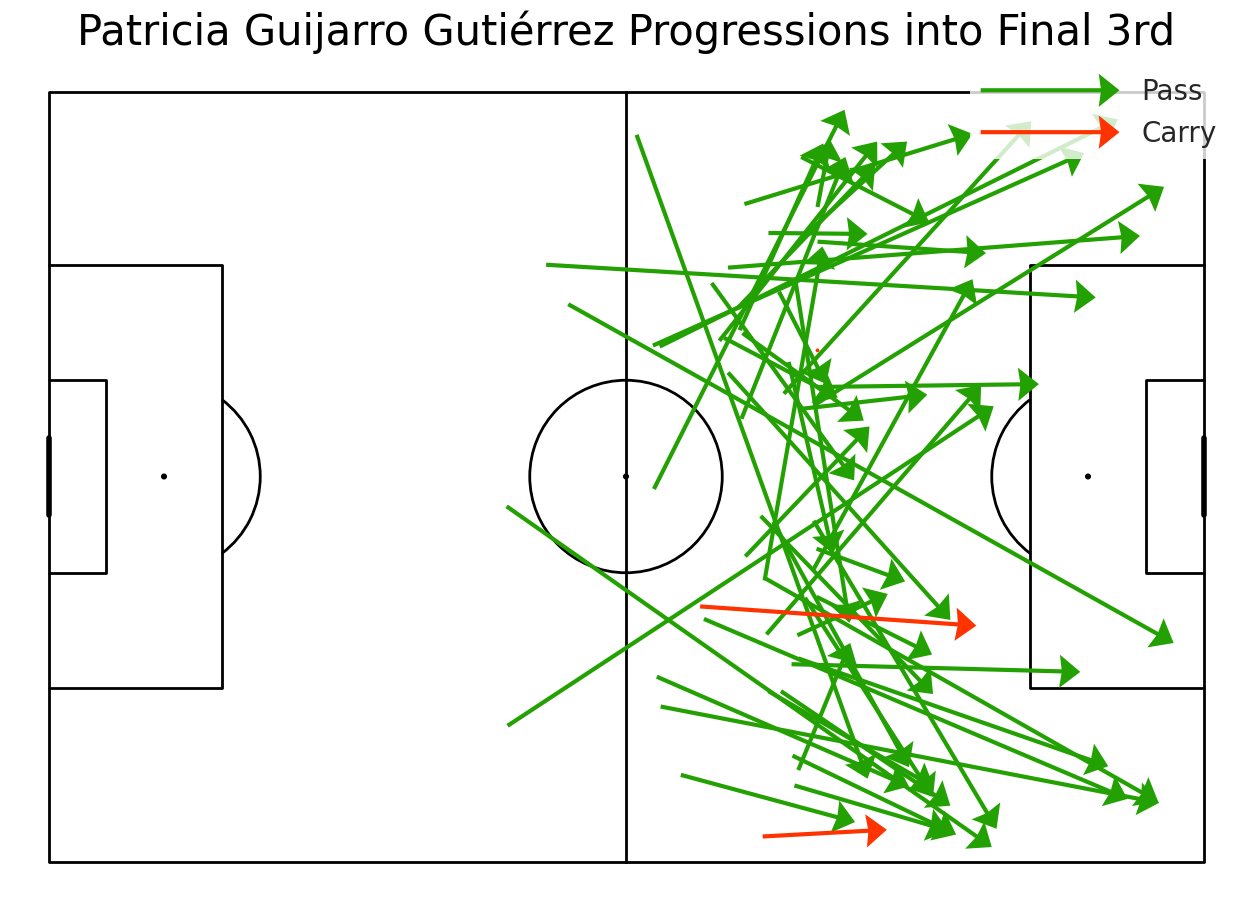

In [15]:
# Select a specific player to visualize
player_name = "Patricia Guijarro Gutiérrez"

# Filter the previously computed 3rd-third passes and carries for this player
player_passes = f3rd_passes[f3rd_passes.player == player_name]
player_carries = f3rd_carries[f3rd_carries.player == player_name]

# Set up the pitch drawing (StatsBomb style, white background)
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# Draw passes as green arrows
pitch.arrows(player_passes.x, player_passes.y,
             player_passes.pass_end_x, player_passes.pass_end_y,
             width=3, headwidth=8, headlength=5, color='#24a102', ax=ax, zorder=2, label="Pass")

# Draw carries as red arrows
pitch.arrows(player_carries.x, player_carries.y,
             player_carries.carry_end_x, player_carries.carry_end_y,
             width=3, headwidth=8, headlength=5, color='#ff3300', ax=ax, zorder=2, label="Carry")

# Add legend and title
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax.set_title(f'{player_name} Progressions into Final 3rd', fontsize=30, color='black')

# Display the figure
plt.show()

#Summary: This code filters the passes and carries of a single player, draws them on a StatsBomb-style pitch as colored arrows (green for passes, red for carries), and adds a legend and title for clarity.

# Creation and Clean of the  dataset

In [16]:
# Rename a column in frames_df to match events_df
frames_df.rename(columns={'event_uuid': 'id'}, inplace=True)

# Merge events_df with frames_df on match_id and id (keep all events)
merged_df = pd.merge(events_df, frames_df, how="left", on=["match_id", "id"])

# Merge the result with euro_2025_female_matches on match_id to add match info
merged_df = pd.merge(merged_df, euro_2025_female_matches, how="left", on="match_id")

# Show all columns in outputs and check the shape of the final dataframe
pd.set_option('display.max_columns', None)
merged_df.shape

#Summary: This code standardizes column names, merges frame-level data with event-level data, and adds match metadata from the Bundesliga/female Euro dataset, producing a comprehensive dataframe for analysis.

(1347073, 145)

In [17]:
merged_df.shape

(1347073, 145)

In [18]:
# --- 2. STRATEGIC PROCESSING (COLLAPSE) ---

# Separate the ball owner (actor) from other players (teammates/rivals)
actor_rows = merged_df[merged_df["actor"] == True].drop_duplicates("id").copy()
others = merged_df[merged_df["actor"] == False].copy()

# IMPROVEMENT: Clean coordinates before pivot
# StatsBomb sometimes stores coordinates as lists [x, y].
# Convert to floats to avoid 'list and float' errors later.
def clean_coords(val):
    if isinstance(val, list) and len(val) > 0:
        return val[0]
    return val

others["location_x"] = others["location_x"].apply(clean_coords)
others["location_y"] = others["location_y"].apply(clean_coords)

# --- 3. CREATE TACTICAL SNAPSHOT (PIVOT) ---

# Label other players as teammate or rival
others["type_label"] = others["teammate"].map({True: "teammate", False: "rival"})

# Count multiple players of the same type per event
others["count"] = others.groupby(["id", "teammate"]).cumcount() + 1

# Pivot to create one column per detected player
x_pivot = others.pivot(index="id", columns=["type_label", "count"], values="location_x")
x_pivot.columns = [f"{t}_{c}_x" for t, c in x_pivot.columns]

y_pivot = others.pivot(index="id", columns=["type_label", "count"], values="location_y")
y_pivot.columns = [f"{t}_{c}_y" for t, c in y_pivot.columns]

# --- 4. FINAL ASSEMBLY ---

# Merge teammate and rival positions into the actor row
merged_df_event_level = actor_rows.merge(x_pivot, on="id", how="left")
merged_df_event_level = merged_df_event_level.merge(y_pivot, on="id", how="left")

# PERFORMANCE: defragment DataFrame and reset index
merged_df_event_level = merged_df_event_level.copy()
merged_df_event_level = merged_df_event_level.reset_index(drop=True)

print("Tactical structure created. Sample new columns:",
      [c for c in merged_df_event_level.columns if 'rival' in c or 'teammate' in c][:5], "...")

#Transforms event-level data into a structured tactical snapshot by merging ball-owner info with teammates’ and rivals’ positions for each action.

Tactical structure created. Sample new columns: ['teammate', 'teammate_1_x', 'teammate_2_x', 'teammate_3_x', 'teammate_4_x'] ...


In [19]:
merged_df_event_level.shape

(90721, 197)

In [20]:
# Sort the event-level dataframe chronologically within each match
# This ensures that all events are in the correct temporal order:
# first by match, then by period (1H/2H etc.), then by minute, then by second.
merged_df_event_level = merged_df_event_level.sort_values(
    by=["match_id", "period", "minute", "second"]
).reset_index(drop=True)

In [21]:
# Step 1: Identify goals for each team as binary flags (1 = goal, 0 = no goal)
# "is_home_goal" marks shots that are goals by the home team
# "is_away_goal" marks shots that are goals by the away team
merged_df_event_level["is_home_goal"] = ((merged_df_event_level["type"] == "Shot") &
                                         (merged_df_event_level["shot_outcome"] == "Goal") &
                                         (merged_df_event_level["team"] == merged_df_event_level["home_team"])).astype(int)

merged_df_event_level["is_away_goal"] = ((merged_df_event_level["type"] == "Shot") &
                                         (merged_df_event_level["shot_outcome"] == "Goal") &
                                         (merged_df_event_level["team"] != merged_df_event_level["home_team"])).astype(int)

# Step 2: Compute cumulative score for each match
# The groupby ensures the cumulative sum resets for each match
merged_df_event_level["home_score"] = merged_df_event_level.groupby("match_id")["is_home_goal"].cumsum()
merged_df_event_level["away_score"] = merged_df_event_level.groupby("match_id")["is_away_goal"].cumsum()

# Step 3: Calculate the score margin (home - away)
# This variable captures the goal difference at any moment, which is important as context for survival models
merged_df_event_level["score_margin"] = merged_df_event_level["home_score"] - merged_df_event_level["away_score"]

#Summary: This block creates the key outcome/context variables for each event:
#Flags for home/away goals.
#Running score for each team during the match.
#score_margin, which provides a dynamic measure of the match situation.
#These are crucial for modeling player behavior or event risk in context-aware analyses, like Cox regression.

In [22]:
merged_df_event_level.groupby("match_id")[["home_team", "away_team", "home_score", "away_score"]].max()

,home_team,away_team,home_score,away_score
match_id,,,,
3998836,Iceland Women's,WNT Finland,0,1
3998837,Switzerland Women's,Norway Women's,1,1
3998838,Belgium Women's,Italy Women's,0,1
3998839,Spain Women's,Portugal Women's,5,0
3998840,Germany Women's,Poland Women's,2,0
3998841,Denmark Women's,Sweden Women's,0,1
3998842,Wales,Netherlands Women's,0,3
3998843,France Women's,England Women's,2,1
3998844,Switzerland Women's,Iceland Women's,2,0


In [23]:
merged_df_event_level.shape

(90721, 200)

# Dataset improvement

In [24]:
# Convert event time into total seconds
# This creates a continuous measure of match time, which is useful for survival or time-based analyses
merged_df_event_level["event_time_sec"] = (
    merged_df_event_level["minute"] * 60 +
    merged_df_event_level["second"]
)

#This line transforms the match time from separate minute and second columns into a single event_time_sec column.
#Essential for time-to-event models like Cox regression, where time needs to be a single numeric variable.

In [25]:
# Create a binary flag for goals
# 1 if the event is a shot that resulted in a goal, 0 otherwise
merged_df_event_level["is_goal"] = (
    (merged_df_event_level["type"] == "Shot") &
    (merged_df_event_level["shot_outcome"] == "Goal")
).astype(int)

#This creates a simple indicator column is_goal to mark all goal events:
#1 for any shot that ended in a goal.
#0 for all other events.

In [26]:
# Vectorized function to calculate the "time to next goal" for each event
def calculate_survival_vectorized(group):
    # Extract the times (in seconds) when goals occurred
    goal_times = group.loc[group["is_goal"] == 1, "event_time_sec"].values
    current_times = group["event_time_sec"].values
    max_time = group["event_time_sec"].max()

    # Case: no goals in the match
    if len(goal_times) == 0:
        group["time_to_next_goal"] = max_time - current_times  # censored duration
        group["event_observed"] = 0  # no event occurred
        return group

    # Find the index of the next goal for each event using binary search
    # Much faster than looping
    idx_next_goal = np.searchsorted(goal_times, current_times, side='right')

    # Boolean mask for events that have a goal in the future
    has_future_goal = idx_next_goal < len(goal_times)

    # Initialize arrays for time-to-event and event flag
    time_to_goal = np.zeros(len(group))
    observed = np.zeros(len(group))

    # Events with a future goal
    time_to_goal[has_future_goal] = goal_times[idx_next_goal[has_future_goal]] - current_times[has_future_goal]
    observed[has_future_goal] = 1  # event occurred

    # Events after the last goal (censored)
    time_to_goal[~has_future_goal] = max_time - current_times[~has_future_goal]
    observed[~has_future_goal] = 0  # censored

    # Assign results to the dataframe
    group["time_to_next_goal"] = time_to_goal
    group["event_observed"] = observed
    return group

# Apply the function to each match (grouped by match_id) for speed
# This produces the survival target variables for Cox models
merged_df_event_level = merged_df_event_level.groupby(
    "match_id", group_keys=False
).apply(calculate_survival_vectorized)

# Ensure the column is numeric
merged_df_event_level["time_to_next_goal"] = merged_df_event_level["time_to_next_goal"].astype(float)

#This code generates the survival analysis target variables for each event:
#time_to_next_goal – how many seconds until the next goal occurs.
#event_observed – 1 if a goal actually occurs after the event, 0 if censored (no further goals in the match).

/tmp/ipython-input-2905776289.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(calculate_survival_vectorized)


In [28]:
#counts how many rows in merged_df_event_level have a negative time_to_next_goal.
(merged_df_event_level["time_to_next_goal"] < 0).sum()

np.int64(0)

In [29]:
merged_df_event_level["time_to_next_goal"].describe()

,time_to_next_goal
count,90721.000000
mean,1328.145137
std,1218.293803
min,0.000000
25%,396.000000
50%,997.000000
75%,1902.000000
max,6751.000000


# Modelo Cox

In [30]:
# --- STEP 1: CALCULATE DISTANCES ---
# Define a function to compute tactical metrics like distance to teammates/rivals
def fast_compute_features_v2(df):
    # Helper: ensure coordinates are floats, even if they come as lists/arrays
    def force_float(series):
        return series.apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) and len(x) > 0 else x).astype(float)

    # Clean actor coordinates
    df['ax_clean'] = force_float(df['location_x'])
    df['ay_clean'] = force_float(df['location_y'])

    # Compute distance metrics for teammates or rivals
    def get_group_metrics(prefix, count):
        all_dists = []
        for i in range(1, count + 1):
            x_col, y_col = f"{prefix}_{i}_x", f"{prefix}_{i}_y"
            if x_col in df.columns and y_col in df.columns:
                xi, yi = force_float(df[x_col]), force_float(df[y_col])
                dist = np.sqrt((xi - df['ax_clean'])**2 + (yi - df['ay_clean'])**2)  # Euclidean distance
                all_dists.append(dist)

        if not all_dists:  # No players found
            return np.full(len(df), np.nan), np.full(len(df), np.nan)
        dist_matrix = np.array(all_dists)
        with np.errstate(all='ignore'):  # Ignore warnings from NaNs
            return np.nanmin(dist_matrix, axis=0), np.nanmean(dist_matrix, axis=0)  # nearest & mean

    # Apply distance computation for teammates (up to 10) and rivals (up to 16)
    df['dist_to_nearest_teammate'], df['mean_dist_teammates'] = get_group_metrics("teammate", 10)
    df['dist_to_nearest_rival'], df['mean_dist_rivals'] = get_group_metrics("rival", 16)

    # Drop temporary cleaned coordinates
    return df.drop(columns=['ax_clean', 'ay_clean'])

# Run the function to add distance-based features
merged_df_event_level = fast_compute_features_v2(merged_df_event_level)


# --- STEP 2: SCORES AND TIMING ---
# Compute cumulative home/away scores at this moment
merged_df_event_level["home_score_after"] = merged_df_event_level.groupby("match_id")["is_home_goal"].cumsum()
merged_df_event_level["away_score_after"] = merged_df_event_level.groupby("match_id")["is_away_goal"].cumsum()

# Shift by 1 to get the score just before the current event
merged_df_event_level["home_score_before"] = merged_df_event_level.groupby("match_id")["home_score_after"].shift(1, fill_value=0)
merged_df_event_level["away_score_before"] = merged_df_event_level.groupby("match_id")["away_score_after"].shift(1, fill_value=0)


# --- STEP 3: SURVIVAL VARIABLES ---
# Define Cox model duration as time until next goal
merged_df_event_level["duration"] = merged_df_event_level["time_to_next_goal"].fillna(5400 - merged_df_event_level["event_time_sec"])
# Replace zero or negative durations with a small number to avoid model errors
merged_df_event_level["duration"] = np.where(merged_df_event_level["duration"] <= 0, 0.001, merged_df_event_level["duration"])


# --- STEP 4: COVARIATE SELECTION & MODEL DATAFRAME ---
# Define covariates for the Cox model
covariates = [
    "home_score_before", "away_score_before",
    "event_time_sec", "location_x", "location_y",
    "dist_to_nearest_teammate", "mean_dist_teammates",
    "dist_to_nearest_rival", "mean_dist_rivals"
]

# Prepare the final dataframe for Cox regression, filling missing values with 0
df_model = merged_df_event_level[covariates + ["duration", "event_observed"]].copy()
df_model = df_model.fillna(0)

print("df_model ready: all features and survival columns prepared.")

#Cleans coordinates and computes tactical distance metrics.
#Calculates scores before and after each event to capture match context.
#Sets up duration (time to next goal) for survival analysis, handling edge cases.
#Creates a final dataframe df_model ready for Cox regression, with no NaNs or invalid durations.

/tmp/ipython-input-1230711896.py:26: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(dist_matrix, axis=0), np.nanmean(dist_matrix, axis=0)  # nearest & mean
/tmp/ipython-input-1230711896.py:26: RuntimeWarning: Mean of empty slice
  return np.nanmin(dist_matrix, axis=0), np.nanmean(dist_matrix, axis=0)  # nearest & mean
/tmp/ipython-input-1230711896.py:26: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(dist_matrix, axis=0), np.nanmean(dist_matrix, axis=0)  # nearest & mean
/tmp/ipython-input-1230711896.py:26: RuntimeWarning: Mean of empty slice
  return np.nanmin(dist_matrix, axis=0), np.nanmean(dist_matrix, axis=0)  # nearest & mean


df_model ready: all features and survival columns prepared.


In [31]:
merged_df_event_level

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_lost_out,goalkeeper_outcome,goalkeeper_penalty_saved_to_post,goalkeeper_position,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location_x,match_id,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y,actor,keeper,location_y,teammate,visible_area,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version,teammate_1_x,teammate_2_x,teammate_3_x,teammate_4_x,teammate_5_x,teammate_6_x,teammate_7_x,teammate_8_x,teammate_9_x,rival_1_x,rival_2_x,rival_3_x,rival_4_x,rival_5_x,rival_6_x,rival_7_x,rival_8_x,rival_9_x,rival_10_x,rival_11_x,teammate_10_x,rival_12_x,rival_13_x,rival_14_x,rival_15_x,rival_16_x,teammate_1_y,teammate_2_y,teammate_3_y,teammate_4_y,teammate_5_y,teammate_6_y,teammate_7_y,teammate_8_y,teammate_9_y,rival_1_y,rival_2_y,rival_3_y,rival_4_y,rival_5_y,rival_6_y,rival_7_y,rival_8_y,rival_9_y,rival_10_y,rival_11_y,teammate_10_y,rival_12_y,rival_13_y,rival_14_y,rival_15_y,rival_16_y,is_home_goal,is_away_goal,score_margin,event_time_sec,is_goal,time_to_next_goal,event_observed,dist_to_nearest_teammate,mean_dist_teammates,dist_to_nearest_rival,mean_dist_rivals,home_score_after,away_score_after,home_score_before,away_score_before
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4190.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f83bbb5c-09b6-48b6-a046-e5a0a13d7913,5,NaN,NaN,"[61.0, 40.1]",3998836,0,NaN,NaN,NaN,NaN,3.044675,NaN,Right Foot,NaN,NaN,NaN,"[46.6, 41.5]",NaN,Ground Pass,NaN,14.467895,NaN,NaN,NaN,NaN,Eveliina Summanen,191850.0,NaN,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,Ria Öling,225383.0,Center Attacking Midfield,2,WNT Finland,920,[bdbb94cd-c462-40a6-ad90-ba924875c66c],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WNT Finland,920,00:00:00.681,Pass,NaN,61.0,40.1,46.6,41.5,NaN,NaN,True,False,"[61.0, 40.099998474121094]",True,"[19.061013423099602, 80.0, 50.54982508069776, ...",2025-07-02,16:00:00.000,Europe - UEFA Women's Euro,2025,Iceland Women's,WNT Finland,0,0,available,available,2025-07-22T20:34:46.172656,2025-07-22T20:37:11.086

In [32]:
# Compute relative pressure: how close the nearest rival is compared to the average distance to all rivals
merged_df_event_level['rel_pressure'] = (
    merged_df_event_level['dist_to_nearest_rival'] /
    (merged_df_event_level['mean_dist_rivals'] + 1e-6)  # small epsilon avoids division by zero
)

# Compute relative support: how close the nearest teammate is compared to the average distance to all teammates
merged_df_event_level['rel_support'] = (
    merged_df_event_level['dist_to_nearest_teammate'] /
    (merged_df_event_level['mean_dist_teammates'] + 1e-6)  # small epsilon avoids division by zero
)

#rel_pressure measures immediate defensive pressure: values <1 mean the closest rival is closer than average, >1 means they are farther than average.
#rel_support measures immediate teammate support: values <1 mean the nearest teammate is closer than average, >1 means teammates are more spread out.

In [33]:
# Compute Isolation Index: how “isolated” the ball-carrier is
merged_df_event_level['isolation_index'] = (
    merged_df_event_level['mean_dist_teammates'] /
    (merged_df_event_level['mean_dist_rivals'] + 1e-6)  # avoid division by zero
)

#isolation_index measures how alone a player is relative to opponents

In [34]:
# Compute Effective Pressure: intensity of immediate defensive pressure
merged_df_event_level['effective_pressure'] = (
    merged_df_event_level['mean_dist_rivals'] -
    merged_df_event_level['dist_to_nearest_rival']
)

#effective_pressure quantifies how strongly a player is being pressured by the closest opponent.

In [35]:
# Compute Risk Balance: measures the net pressure vs. support around the player
merged_df_event_level['risk_balance'] = (
    merged_df_event_level['rel_pressure'] -
    merged_df_event_level['rel_support']
)

#risk_balance captures the tactical balance between danger and support at the moment of the event.

In [36]:
# --- IMPROVEMENT: LIMIT OUTLIERS ---
# Tactical ratios can have extreme values that are not meaningful (e.g., >10-20)
# Clipping ensures the Cox model remains numerically stable.

cols_to_clip = ['rel_pressure', 'rel_support', 'isolation_index', 'risk_balance']

for col in cols_to_clip:
    # Set an upper limit at the 99th percentile to remove extreme noise
    upper_limit = merged_df_event_level[col].quantile(0.99)
    merged_df_event_level[col] = merged_df_event_level[col].clip(upper=upper_limit)

print("Variables normalized and clipped to improve model stability.")

Variables normalized and clipped to improve model stability.


In [37]:
#generates a summary statistics table for the main tactical metrics.
merged_df_event_level[
    ['rel_pressure', 'rel_support',
     'isolation_index', 'effective_pressure', 'risk_balance']
].describe()

,rel_pressure,rel_support,isolation_index,effective_pressure,risk_balance
count,9.061600e+04,90616.000000,90531.000000,90616.000000,90531.000000
mean,2.044023e-01,0.243593,1.094393,7.902933,-0.040441
std,1.952273e-01,0.190107,0.409514,3.321102,0.252714
min,2.837212e-07,0.000000,0.002132,0.000000,-0.996741
25%,6.036000e-02,0.089859,0.813320,5.601428,-0.192125
50%,1.404846e-01,0.201505,0.993996,7.468354,-0.037081
75%,2.852775e-01,0.355918,1.288713,9.797651,0.101237
max,8.949811e-01,0.832570,2.645799,27.403828,0.627582


In [38]:
#Computes the logarithm of the isolation index, using log1p to safely handle zeros (log1p(x) = log(1 + x)).
merged_df_event_level['log_isolation'] = np.log1p(
    merged_df_event_level['isolation_index']
)

# Entrenamiento del modelo

In [39]:
!pip install -q lifelines

from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler

In [40]:
# 1. Select non-redundant covariates that capture different tactical concepts
final_covariates = [
    "rel_pressure",       # Pressure relative to opponent block
    "rel_support",        # Support relative to teammate block
    "effective_pressure", # Immediate pressure on the ball
    "log_isolation"       # Isolation index (log-transformed for normalization)
]

# 2. Build the final dataset for Cox regression, removing NaNs and infinite values
cox_df = merged_df_event_level[["duration", "event_observed"] + final_covariates].copy()
cox_df = cox_df.replace([np.inf, -np.inf], np.nan).dropna()

# 3. Standardize covariates (Z-score) to improve model convergence and comparability
scaler = StandardScaler()
cox_df[final_covariates] = scaler.fit_transform(cox_df[final_covariates])

# 4. Fit Cox Proportional Hazards model with slight L2 regularization (penalizer)
# Regularization stabilizes estimation, especially with correlated or noisy features
cph = CoxPHFitter(penalizer=0.1)
cph.fit(
    cox_df,
    duration_col="duration",      # Time until next goal
    event_col="event_observed"    # Whether a goal occurred (1) or censored (0)
)

# 5. Display model coefficients, hazard ratios, confidence intervals, and summary statistics
cph.print_summary()

#Summary of intent:The code prepares tactical metrics for survival analysis.
#Scaling ensures the coefficients are comparable.
#Cox regression estimates how each tactical feature influences the “hazard” of a goal happening.
#Regularization avoids extreme coefficient estimates in the presence of correlated features.

<lifelines.CoxPHFitter: fitted with 90531 total observations, 13430 right-censored observations>
             duration col = 'duration'
                event col = 'event_observed'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 90531
number of events observed = 77101
   partial log-likelihood = -800263.37
         time fit was run = 2026-02-11 11:26:09 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
rel_pressure        0.00      1.00      0.00           -0.00            0.01                1.00                1.01
rel_support         0.01      1.01      0.00           -0.00            0.01                1.00                1.01
effective_pressure -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
log_isolation       0.00      1.00      0.00           -0.01            0.01                0.99                1.01

                    cmp to     z    p  -log2(p)
covariate                                      
rel_pressure          0.00  1.17 0.24      2.05
rel_support           0.00  1.70 0.09      3.49
effective_pressure    0.00 -0.86 0.39      1.36
log_isolation         0.00  0.39 0.69      0.53
---
Concordance = 0.51
Partial AIC = 1600534.75
log-likelihood ratio test = 7.15 on 4 df
-log2(p) of ll-ratio test = 2.96

In [41]:
# --- STEP 1: CLEAN COORDINATES ---
# StatsBomb sometimes stores x/y as lists [x, y].
# Convert them to floats to avoid TypeErrors in later calculations.
def force_float(series):
    return series.apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).astype(float)

merged_df_event_level['location_x'] = force_float(merged_df_event_level['location_x'])
merged_df_event_level['location_y'] = force_float(merged_df_event_level['location_y'])

# --- STEP 2: FILTER EVENTS IN FINAL THIRD ---
# Only keep actions where the ball is beyond x > 80
cox_df_filtered = merged_df_event_level[merged_df_event_level['location_x'] > 80].copy()

# --- STEP 3: SELECT COVARIATES WITH CONTEXT ---
# Include score margin and event time for context in the model
if 'score_margin' not in cox_df_filtered.columns:
    cox_df_filtered['score_margin'] = cox_df_filtered['home_score_before'] - cox_df_filtered['away_score_before']

covariates_v2 = [
    'score_margin',     # Game context: lead or deficit
    'event_time_sec',   # Event timing
    'rel_pressure',     # Pressure relative to opponents
    'rel_support',      # Support relative to teammates
    'log_isolation'     # Isolation metric (log-transformed)
]

# --- STEP 4: SCALE AND FIT MODEL ---
from sklearn.preprocessing import StandardScaler

# Remove NaNs and infinite values before fitting
train_df = cox_df_filtered[covariates_v2 + ["duration", "event_observed"]].copy()
train_df = train_df.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize covariates for numerical stability
scaler = StandardScaler()
train_df[covariates_v2] = scaler.fit_transform(train_df[covariates_v2])

# Fit Cox Proportional Hazards model with mild L2 regularization
cph = CoxPHFitter(penalizer=0.1)
cph.fit(train_df, duration_col="duration", event_col="event_observed")

# Display the model summary (coefficients, hazard ratios, significance, etc.)
cph.print_summary()

#Summary:Cleans coordinate data and filters for final-third actions.
#Adds contextual covariates like score margin and event time.
#Standardizes features to stabilize Cox regression.

<lifelines.CoxPHFitter: fitted with 23159 total observations, 3611 right-censored observations>
             duration col = 'duration'
                event col = 'event_observed'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 23159
number of events observed = 19548
   partial log-likelihood = -175828.69
         time fit was run = 2026-02-11 11:26:26 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
score_margin    0.12      1.12      0.01            0.10            0.13                1.11                1.14
event_time_sec  0.15      1.16      0.01            0.13            0.16                1.14                1.17
rel_pressure    0.01      1.01      0.01            0.00            0.03                1.00                1.03
rel_support    -0.00      1.00      0.01           -0.01            0.01                0.99                1.01
log_isolation  -0.01      0.99      0.01           -0.03           -0.00                0.97                1.00

                cmp to     z      p  -log2(p)
covariate                                    
score_margin      0.00 16.56 <0.005    202.16
event_time_sec    0.00 19.13 <0.005    268.61
rel_pressure      0.00  2.07   0.04      4.71
rel_support       0.00 -0.19   0.85      0.24
log_isolation     0.00 -2.03   0.04      4.56
---
Concordance = 0.56
Partial AIC = 351667.37
log-likelihood ratio test = 672.43 on 5 df
-log2(p) of ll-ratio test = 472.87

In [42]:
# Calculate the “danger” or goal risk each player generated in their actions
# Using the Cox model, predict the partial hazard for every event
cox_df_filtered['danger_generated'] = cph.predict_partial_hazard(train_df)

# Compute the average danger per player and sort descending
ranking = cox_df_filtered.groupby('player')['danger_generated'].mean().sort_values(ascending=False)

# Display the top 10 players who generated the most danger
print("Top 10 Players generating the most danger (360° context):")
print(ranking.head(10))

Top 10 Players generating the most danger (360° context):
player
Andreia Martins Faria               1.658760
Kassandra Ndoutou Eboa Missipo      1.632766
Grace Clinton                       1.450174
Cristina Martín-Prieto Gutierrez    1.443460
Niamh Charles                       1.433137
Karina Sævik                        1.413045
Jessica Park                        1.412000
Agnes Beever-Jones                  1.392257
Synne Jensen                        1.373842
Julie Piga                          1.371993
Name: danger_generated, dtype: float64


#Split partidos

In [43]:
# Get a list of unique matches
unique_matches = cox_df_filtered["match_id"].unique()

# Shuffle the match IDs randomly for unbiased train/test split
np.random.seed(42)
np.random.shuffle(unique_matches)

# Split 70% for training, 30% for testing
split_idx = int(len(unique_matches) * 0.7)
train_matches = unique_matches[:split_idx]
test_matches = unique_matches[split_idx:]

# Create training and testing datasets based on match IDs
train_df = cox_df_filtered[cox_df_filtered["match_id"].isin(train_matches)].copy()
test_df = cox_df_filtered[cox_df_filtered["match_id"].isin(test_matches)].copy()

# Print how many matches went into each set
print("Train matches:", len(train_matches))
print("Test matches:", len(test_matches))

#Summary:Ensures train/test split is by match, not by individual events, to avoid data leakage.

Train matches: 21
Test matches: 10


In [44]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform training covariates
train_df[covariates_v2] = scaler.fit_transform(train_df[covariates_v2])

# Transform the test set using the same scaler (no refitting!)
test_df[covariates_v2] = scaler.transform(test_df[covariates_v2])

In [45]:
# 1. Specify exactly which columns the Cox model will use
columns_for_model = covariates_v2 + ["duration", "event_observed"]

# 2. Clean the training data: remove NaNs and infinities
# This step is essential right before fitting the model
train_df_clean = train_df[columns_for_model].replace([np.inf, -np.inf], np.nan).dropna()

# 3. Quick verification to check how many rows were removed
print(f"Original training rows: {len(train_df)}")
print(f"Training rows after cleaning: {len(train_df_clean)}")

# 4. Initialize the Cox Proportional Hazards model with a small regularization
cph = CoxPHFitter(penalizer=0.1)

# 5. Fit the Cox model on the cleaned training data
cph.fit(
    train_df_clean,
    duration_col="duration",      # time-to-event column
    event_col="event_observed"    # event occurrence column (1 if goal, 0 if censored)
)

# 6. Print a summary of coefficients, standard errors, significance, and model statistics
cph.print_summary()

#Summary / purpose: Ensures the model only sees valid numeric data.

Original training rows: 14907
Training rows after cleaning: 14855


<lifelines.CoxPHFitter: fitted with 14855 total observations, 1928 right-censored observations>
             duration col = 'duration'
                event col = 'event_observed'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 14855
number of events observed = 12927
   partial log-likelihood = -110427.60
         time fit was run = 2026-02-11 11:26:32 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
score_margin    0.12      1.13      0.01            0.10            0.14                1.11                1.15
event_time_sec  0.19      1.20      0.01            0.17            0.20                1.18                1.23
rel_pressure    0.02      1.02      0.01            0.01            0.04                1.01                1.04
rel_support    -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
log_isolation  -0.02      0.98      0.01           -0.04           -0.01                0.96                0.99

                cmp to     z      p  -log2(p)
covariate                                    
score_margin      0.00 14.02 <0.005    145.86
event_time_sec    0.00 19.73 <0.005    285.52
rel_pressure      0.00  2.81 <0.005      7.67
rel_support       0.00 -0.64   0.52      0.93
log_isolation     0.00 -2.56   0.01      6.56
---
Concordance = 0.56
Partial AIC = 220865.19
log-likelihood ratio test = 624.04 on 5 df
-log2(p) of ll-ratio test = 438.12

In [46]:
# 1. Define the columns required for the Cox model
model_cols = covariates_v2 + ["duration", "event_observed"]

# 2. Strict cleaning of the test set
# Remove any rows with NaNs or infinities to ensure predictions are valid
test_df_clean = test_df[model_cols].replace([np.inf, -np.inf], np.nan).dropna()

# 3. Generate predictions of partial hazard for each row in the clean test set
# Note: only the covariates are used, not the duration or event columns
test_pred = cph.predict_partial_hazard(test_df_clean[covariates_v2])

# 4. Compute the concordance index (C-Index) as an out-of-sample metric
# A measure of how well the model predicts the ordering of events
# Negative sign: higher hazard means shorter time to event
from lifelines.utils import concordance_index

c_index_test = concordance_index(
    test_df_clean["duration"],   # observed durations
    -test_pred,                  # predicted hazard (negative because higher hazard = shorter survival)
    test_df_clean["event_observed"]  # event indicators (1 if event occurred, 0 if censored)
)

# 5. Print summary of cleaning and performance
print(f"Original test rows: {len(test_df)}")
print(f"Test rows after cleaning: {len(test_df_clean)}")
print("-" * 30)
print(f"Test Concordance Index: {c_index_test:.4f}")

#Key points / purpose: Cleans the test set to avoid errors from invalid values.
#Predicts “danger” or hazard for each event using the trained Cox model.

Original test rows: 8322
Test rows after cleaning: 8304
------------------------------
Test Concordance Index: 0.5421


In [47]:
# 1. Create a clean version of the test set including the 'player' column
# This is necessary for grouping later
test_df_clean = test_df.replace([np.inf, -np.inf], np.nan).dropna(subset=covariates_v2 + ["duration", "event_observed"])

# 2. Predict the partial hazard (risk of next goal) for each row
test_pred = cph.predict_partial_hazard(test_df_clean[covariates_v2])

# 3. Assign predictions to the cleaned dataframe
# Using the same cleaned dataframe ensures lengths match exactly
test_df_clean["danger_generated"] = test_pred

# 4. Compute an average “danger” score per player
# Groups by player and takes mean hazard across all their actions
ranking_test = (
    test_df_clean.groupby("player")["danger_generated"]
    .mean()
    .sort_values(ascending=False)  # highest danger first
)

# 5. Print summary
print(f"Predictions calculated for {len(test_df_clean)} events.")
print("-" * 30)
print("Top 10 players (OUT OF SAMPLE):")
print(ranking_test.head(10))

#Summary: Converts row-level hazard predictions into a player-level metric of danger generated.
#Ensures the test data is clean, avoiding NaNs/Infs.

/tmp/ipython-input-4137510588.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_clean = test_df.replace([np.inf, -np.inf], np.nan).dropna(subset=covariates_v2 + ["duration", "event_observed"])


Predictions calculated for 8304 events.
------------------------------
Top 10 players (OUT OF SAMPLE):
player
Sara Däbritz         1.683804
Janina Minge         1.557214
Julie Piga           1.509856
Noelle Maritz        1.492048
Selina Cerci         1.486795
Riola Xhemaili       1.480098
Giovanna Hoffmann    1.396577
Grace Clinton        1.395825
Kelly Gago           1.386218
Ellen Wangerheim     1.379918
Name: danger_generated, dtype: float64
